# **Exploring Different Deep Learning Models**

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 4.7 MB/s eta 0:00:00


Importing the Libraries

In [ ]:
import pandas as pd
import csv
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

## **DATA PREPROCESSING**



*   Formatting the dataset



In [ ]:
def extract(text):
    # Split the text on the last comma to separate the boolean value
    parts = text.rsplit(',', 1)
    # Extract the string part and trim any extra whitespace
    if len(parts) == 2:
        es = parts[0].strip()
        bv = parts[1].strip().lower() == 'true'
    else: # If there's no comma, handle it by returning the entire text and a default false value
        es = text.strip()
        bv = False

    return es, bv

def process_file(filepath, output_filepath):
    results = [] # List to store the results as tuples (extracted_string, boolean_value)
    s = ""

    with open(filepath, 'r') as file:
        ls = file.readlines()

    # Process each line in the file
    for i, l in enumerate(ls):
        l = l.strip()
        if l:
            s += l + " "
        if (i + 1 == len(ls) or not ls[i + 1].strip()) and s:
            es, bv = extract(s.strip())
            results.append((es, bv))
            s = ""
    with open(output_filepath, 'w') as outfile:
        for result in results:
            outfile.write(f"{result[0]}, {result[1]}\n")

input_file_path = '/content/original_sarcasm_data.txt'
output_file_path = 'output_file.txt'
process_file(input_file_path, output_file_path)

In [ ]:
df = pd.read_csv('output_file.txt', header=None, delimiter='\t')
df.head()

,0
0,Fantastic service yet again from EE. 1st you u...
1,Not sure if that was or #realtalk . I'll take ...
2,Barely 9 am and already shaking with rage. #g...
3,@deray I guess that proves it then. Black folk...
4,"@the_FF_engineer Does this tweet need a tag?, ..."


In [ ]:
df.to_csv('output_file.csv', index=False)



*   Handling URLs, Hashtags and Mentions




In [ ]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove @mentions
    text = re.sub(r'@\w+', '', text)
    return text.strip()

def process_csv(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        r = csv.reader(file)
        h = next(r)
        df = list(r)
# Clean text in the CSV data, handling potential IndexError
    cleaned_data = [(clean_text(row[0]), row[1] if len(row) > 1 else '') for row in df] # Handle cases where row might have only one element
 # Write cleaned data to a new CSV file
    with open(output_file, 'w', newline='', encoding='utf-8') as file:
        w = csv.writer(file)
        w.writerow(h)
        for row in cleaned_data:
            w.writerow(row)
    # Print the message after processing is done and within the function's scope
    print("Cleaned data has been written to", output_file)

# Call the function with the file paths
process_csv('output_file.csv', 'cleaned_output.csv')

Cleaned data has been written to cleaned_output.csv




*   Replacing Emojis to a descriptive word




In [ ]:
def replace_emojis_with_descriptions(text):
    def replace(match):
        emoji_desc = match.group(0)
        try:
            return emoji.demojize(emoji_desc)
        except KeyError:
            return ''  # If emoji not found, replace with an empty string

    emojis = re.compile("["
                       u"\U0001F600-\U0001F64F"
                       u"\U0001F300-\U0001F5FF"
                       u"\U0001F680-\U0001F6FF"
                       u"\U0001F700-\U0001F77F"
                       u"\U0001F780-\U0001F7FF"
                       u"\U0001F800-\U0001F8FF"
                       u"\U0001F900-\U0001F9FF"
                       u"\U0001FA00-\U0001FA6F"
                       u"\U0001FA70-\U0001FAFF"
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)
    return emojis.sub(replace, text)

def process_file(input_file_path, output_file_path):
    with open(input_file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    cleaned_lines = [replace_emojis_with_descriptions(line) for line in lines]

    with open(output_file_path, 'w', encoding='utf-8') as file:
        file.writelines(cleaned_lines)

input_path = 'cleaned_output.csv'
output_path = 'emoji_removed.txt'
process_file(input_path, output_path)
process_csv('cleaned_output.csv', 'emoji_removed.csv')

Cleaned data has been written to emoji_removed.csv




*   Handling Abbreviations




In [ ]:
def expand_contractions(text):
    # Define common contractions and their expansions
    contractions_dict = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "could've": "could have",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "how'd": "how did",
        "how'll": "how will",
        "how's": "how is",
        "I'd": "I would",
        "I'll": "I will",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it would",
        "it'll": "it will",
        "it's": "it is",
        "let's": "let us",
        "mustn't": "must not",
        "shan't": "shall not",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'll": "we will",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "where'd": "where did",
        "where's": "where is",
        "who'll": "who will",
        "who's": "who is",
        "won't": "will not",
        "would've": "would have",
        "wouldn't": "would not",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
    }

    # Regular expression pattern for finding contractions
    contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = contractions_dict.get(match) if contractions_dict.get(match) else contractions_dict.get(match.lower())
        return expanded_contraction

    # Replace contractions with their expansions
    expanded_text = contractions_re.sub(expand_match, text)
    return expanded_text

# Open final.txt for reading
with open('emoji_removed.csv', 'r') as infile:
    # Read lines from the file
    lines = infile.readlines()

# Apply expand_contractions() function to each line
expanded_lines = [expand_contractions(line) for line in lines]

# Write the expanded content to expanded_final.txt
with open('final.txt', 'w') as outfile:
    # Write each expanded line to the output file
    for line in expanded_lines:
        outfile.write(line)
process_csv('emoji_removed.csv', 'final.csv')

Cleaned data has been written to final.csv




*   Removing Special Characters




In [ ]:
# Define a function to remove special characters
def remove_special_characters(text):
    # Remove special characters except for ",", ".", "!", and newline characters
    cleaned_text = re.sub(r'[^\w\s,.!\n]', '', text)
    return cleaned_text

with open('final.csv', 'r') as infile:
    # Read lines from the file
    lines = infile.readlines()

# Apply remove_special_characters() function to each line
cleaned_lines = [remove_special_characters(line) for line in lines]

# Write the cleaned content to final_cleaned.txt
with open('final_cleaned.csv', 'w') as outfile:
    # Write each cleaned line to the output file
    for line in cleaned_lines:
        outfile.write(line)

**Merging the two datasets**

In [ ]:
df1 = pd.read_csv("final_cleaned.csv")
df2 = pd.read_csv('Clean_Dataset.csv')

df1 = df1.rename(columns={"sarcsam": "Sarcasm", "tweet": "Tweet"})
df2 = df2.rename(columns={"Label": "Sarcasm", "Tweets": "Tweet"})

df1['Sarcasm'] = df1['Sarcasm'].replace({'sarcastic': 'yes', 'non sarcastic': 'no', 'not sarcastic': 'no'})
merged_df = pd.concat([df1[['Tweet', 'Sarcasm']], df2[['Tweet', 'Sarcasm']]], ignore_index=True)

merged_df.to_csv('Merge.csv', index=False)

# **Tokenization**

In [ ]:
df = pd.read_csv('merged_file.csv', index_col=False)

df.head()

,Tweet,Sarcasm
0,Fantastic service yet again from EE. 1st you u...,yes
1,Not sure if that was or. I will take it! face_...,yes
2,Barely 9 am and already shaking with rage.,yes
3,I guess that proves it then. Black folks have ...,yes
4,Does this tweet need a tag,yes




*   Word Tokenization




In [ ]:
# Initialize the TweetTokenizer
tokenizer = TweetTokenizer()

def tokenize_text(Tweet):
    return tokenizer.tokenize(Tweet)

df = pd.read_csv('merged_file.csv')
df['tokens'] = df['Tweet'].apply(tokenize_text)

print(df.head(15))
df.to_csv('t_dataset.csv', index=False)

                                                Tweet Sarcasm  \
0   Fantastic service yet again from EE. 1st you u...     yes   
1   Not sure if that was or. I will take it! face_...     yes   
2          Barely 9 am and already shaking with rage.     yes   
3   I guess that proves it then. Black folks have ...     yes   
4                          Does this tweet need a tag     yes   
5   both. Wont be using you again. Made a formal c...     yes   
6                Fuuuuuuuuck this shit screams thug!!     yes   
7   66 UEs from Staniel and he wins in straights. ...     yes   
8              totally surprising to every husker fan     yes   
9                     Haha got to love the enthusiasm     yes   
10  a southern pride advocate but of course it has...     yes   
11  So nice not hearing any rumors that the  are n...     yes   
12  We should divide illegals into two lines one f...     yes   
13      does not even look like that great of a view.     yes   
14  Mondays are always dr

# **Encoding**



*   TF-IDF(Term Frequency-Inverse Document Frequency)




In [ ]:
#tfidf
tweets = df['Tweet']
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(tweets)
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
final_df = pd.concat([df.drop('Tweet', axis=1), tfidf_df], axis=1)
final_df.to_csv("tfidf_encoded_tweets.csv", index=False)

# **Handling Imbalance in our Dataset**

# **DL Model**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Small.csv', index_col=False)



*   Bidirectional Long Short-Term Memory (BLSTM) Networks



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.metrics import f1_score, classification_report # Import classification_report
import seaborn as sns

Epoch 1/10
22/22 [==============================] - 27s 672ms/step - loss: 0.5289 - accuracy: 0.7330 - val_loss: 0.3410 - val_accuracy: 0.8838
Epoch 2/10
22/22 [==============================] - 12s 544ms/step - loss: 0.3031 - accuracy: 0.8795 - val_loss: 0.2576 - val_accuracy: 0.8997
Epoch 3/10
22/22 [==============================] - 12s 545ms/step - loss: 0.1729 - accuracy: 0.9360 - val_loss: 0.3221 - val_accuracy: 0.8853
Epoch 4/10
22/22 [==============================] - 12s 551ms/step - loss: 0.0852 - accuracy: 0.9722 - val_loss: 0.3070 - val_accuracy: 0.8947
Epoch 5/10
44/44 [==============================] - 2s 35ms/step - loss: 0.2576 - accuracy: 0.8997
Test Loss: 0.2576, Accuracy: 0.8997
44/44 [==============================] - 4s 33ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       648
           1       0.87      0.95      0.91       738

    accuracy                           0.90      138

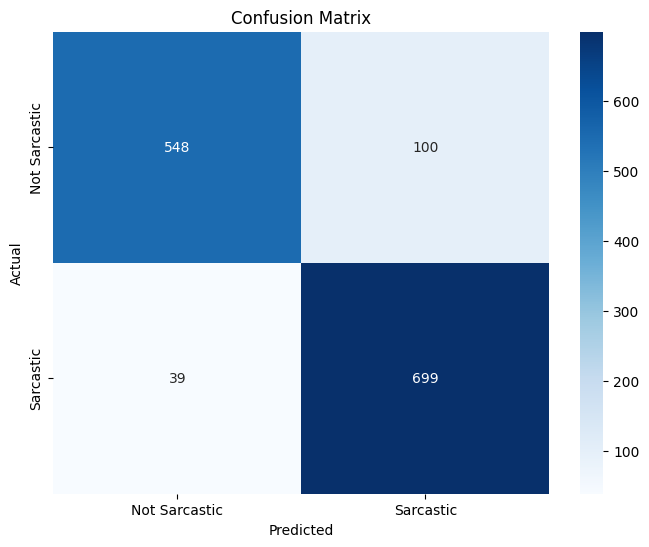

1/1 [==============================] - 0s 29ms/step
This text is predicted to be sarcastic.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
max_len = 100
vocab_size = 10000
embedding_dim = 512

texts = df['Tweet']
texts = texts.astype(str)
labels = df['Sarcasm']
labels = df['Sarcasm'].map({'yes': 1, 'no': 0})

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Define the BLSTM model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(512, return_sequences=True)))
model.add(Bidirectional(LSTM(328, return_sequences=True)))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

new_text = "Can't wait to crush my to-do list ,tomorrow."
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction > 0.5:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")



*   **Convolutional Neural Networks (CNNs) with Gated Convolutions:**




Epoch 1/12
77/77 [==============================] - 33s 310ms/step - loss: 1.9293 - accuracy: 0.7381 - val_loss: 0.7514 - val_accuracy: 0.8838
Epoch 2/12
77/77 [==============================] - 19s 253ms/step - loss: 0.4812 - accuracy: 0.9197 - val_loss: 0.4263 - val_accuracy: 0.8831
Epoch 3/12
77/77 [==============================] - 20s 261ms/step - loss: 0.2003 - accuracy: 0.9674 - val_loss: 0.3281 - val_accuracy: 0.8983
Epoch 4/12
77/77 [==============================] - 20s 260ms/step - loss: 0.3133 - accuracy: 0.9192 - val_loss: 0.5169 - val_accuracy: 0.8730
Epoch 5/12
77/77 [==============================] - 19s 246ms/step - loss: 0.1658 - accuracy: 0.9784 - val_loss: 0.3990 - val_accuracy: 0.8896
Epoch 6/12
44/44 [==============================] - 3s 50ms/step - loss: 0.3281 - accuracy: 0.8983
Test Loss: 0.3281, Accuracy: 0.8983
44/44 [==============================] - 2s 39ms/step
F1 Score (weighted): 0.8981
Classification Report:
              precision    recall  f1-score  

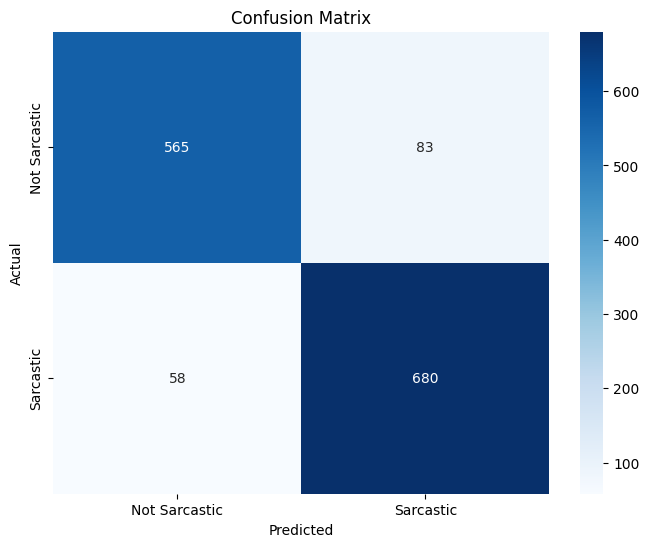

1/1 [==============================] - 0s 246ms/step
This text is predicted to be non-sarcastic.


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input, Concatenate, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Hyperparameters (adjust as needed)
max_len = 100
vocab_size = 10000
embedding_dim = 512
filter_sizes = [3, 4, 5]
num_filters = 64
dropout_rate1 = 0.4
dropout_rate2= 0.2
l2_lambda = 0.01

# Load preprocessed data (replace with your actual data)
texts = df['Tweet']
labels = df['Sarcasm']
labels = df['Sarcasm'].map({'yes': 1, 'no': 0}) # Map 'yes' to 1 and 'no' to 0

# Tokenization
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len) #ensures all sequences have the same length

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Define the model
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(vocab_size, embedding_dim, input_length=max_len)(input_layer)

conv_layers = [] #creates an empty list
for filter_size in filter_sizes: #loop creates multiple convolutional blocks
    conv_layer = Conv1D(num_filters, filter_size, activation='tanh', padding='same')(embedding_layer) #Applies 1D convolution
    gated_conv_layer = Conv1D(num_filters, filter_size, activation='sigmoid', padding='same')(conv_layer)
    drop_layer = Dropout(dropout_rate2)(gated_conv_layer)
    pooled_layer = GlobalMaxPooling1D()(drop_layer)
    conv_layers.append(pooled_layer)

merged_layer = Concatenate()(conv_layers) #combines the outputs from all convolutional blocks using concatenation, creating a richer representation.

# additional dense and dropout layers
dense_layer1 = Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda))(merged_layer)   #dense layer(fully connected) with 128 neurons and ReLU activation
dropout_layer1 = Dropout(dropout_rate1)(dense_layer1)

# an LSTM layer
lstm_layer = Bidirectional(LSTM(1024, return_sequences=False))(embedding_layer) #Bidirectional LSTM layer with 64 units(LSTM cells) #return_true-ensures the LSTM layer outputs a single vector representing the entire sequence

# Concatenate LSTM output with CNN output
concat_layer = Concatenate()([dropout_layer1, lstm_layer]) #combines the outputs from dense layer 1 (after dropout) and the LSTM layer

# Final dense layers
dense_layer2 = Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda))(concat_layer)
dropout_layer2 = Dropout(dropout_rate1)(dense_layer2)
#final dense layer with sigmoid activation outputs the model's prediction for sarcasm
output_layer = Dense(1, activation='sigmoid')(dropout_layer2) #sigmoid function outputs a probability-like value between 0 and 1

model = Model(inputs=input_layer, outputs=output_layer) #creates a Keras model object.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=12, batch_size=72, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
y_pred = (model.predict(X_test) > 0.5).astype("int32")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Make predictions on new data (optional)
new_text = "My mom asked me this question as well."  # Replace with your text
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction ==1:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")


*   **Gated Recurrent Units (GRUs):**



Epoch 1/10
22/22 [==============================] - 12s 275ms/step - loss: 0.4881 - accuracy: 0.7738 - val_loss: 0.3170 - val_accuracy: 0.8810
Epoch 2/10
22/22 [==============================] - 5s 226ms/step - loss: 0.2367 - accuracy: 0.9058 - val_loss: 0.2804 - val_accuracy: 0.8925
Epoch 3/10
22/22 [==============================] - 5s 235ms/step - loss: 0.1148 - accuracy: 0.9573 - val_loss: 0.3352 - val_accuracy: 0.8853
Epoch 4/10
22/22 [==============================] - 5s 233ms/step - loss: 0.0535 - accuracy: 0.9803 - val_loss: 0.4637 - val_accuracy: 0.8903
Epoch 5/10
44/44 [==============================] - 1s 16ms/step - loss: 0.2804 - accuracy: 0.8925
Test Loss: 0.2804, Accuracy: 0.8925
44/44 [==============================] - 1s 14ms/step
F1 Score (weighted): 0.8920
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       648
           1       0.87      0.94      0.90       738

    accuracy               

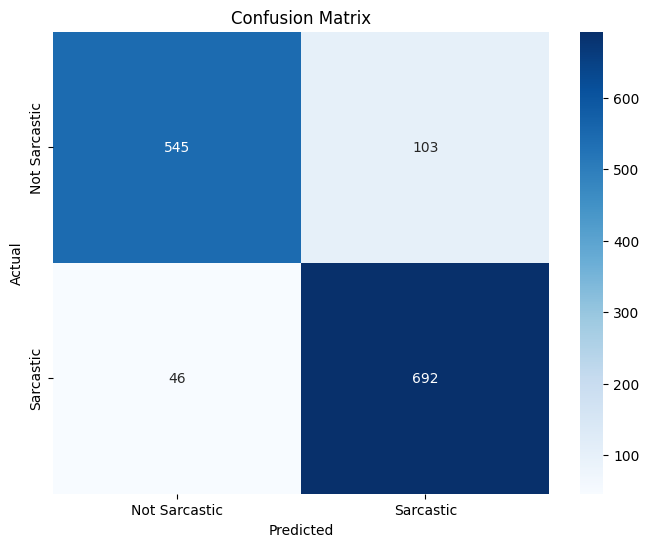

1/1 [==============================] - 0s 22ms/step
This text is predicted to be non-sarcastic.


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split # Import train_test_split

# Hyperparameters (adjust as needed)
max_len = 100  # Maximum sequence length
vocab_size = 10000  # Limit on the number of words in vocabulary
embedding_dim = 512  # Dimensionality of word embeddings

# Load preprocessed data (replace with your actual data)
texts = df['Tweet']  # List to store your text data (sarcastic and non-sarcastic)
labels = df['Sarcasm']  # List to store labels (1 for sarcastic, 0 for non-sarcastic)
labels = df['Sarcasm'].map({'yes': 1, 'no': 0})

# Tokenization
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences to a fixed length
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Define the GRU model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GRU(512, return_sequences=True)) #(return_sequences_true)ensures the layer outputs a sequence of hidden states for each timestep (keeps the sequence information)
model.add(GRU(512, return_sequences=True))
model.add(GRU(256)) #(return_sequences_False)(default) layer outputs a single vector representing the entire sequence.
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #final dense layer with sigmoid activation outputs the model's prediction for sarcasm(probability-like value between 0 and 1)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
y_pred = (model.predict(X_test) > 0.5).astype("int32")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Make predictions on new data (optional)
new_text = "My mom asked me this question as well."  # Replace with your text
sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
if prediction ==1:
    print("This text is predicted to be sarcastic.")
else:
    print("This text is predicted to be non-sarcastic.")

# **Conclusion**
**Data Loading and Preprocessing:**

Loaded the dataset and displayed basic information.

Cleaned the data by removing @,# and URLs and also emojis.

Encoded and Tokenized the labels.

**Handling Imbalanced Data:**

Used SMOTE to handle imbalanced data. Visualized the class distribution before and after resampling.

**Training and Evaluating the Model:**

Tried various deep learning models and found blstm to have the best performance among them.


Tested the model with new random tweets and displayed the results